This workshop was created for the MSU AI Club, but may be used by anyone! There is a corresponding [Hints & FAQ document](https://msu-ai.notion.site/The-Mystery-of-the-Sorting-Hat-e1117e773eb04736b5ec073f4c1282b8) if you ever get stuck or want to learn more.

# Step 1: Download the names & labels
The code below will grab a list of all the attendees' names and display them along with their sorting hat group. **Run it by pressing the play button to the left of the code.**

In [2]:
import pandas as pd

# Get the "dataframe" (spreadsheet) of names and labels
dataframe = pd.read_csv("../input/datacsv/data.csv")

# Show the dataframe
dataframe

,Name,Label
0,Lalit Chitibomma,A
1,Emily Feuer,B
2,Mohammad Alshaikhusain,A
3,Lewi Anamo,A
4,Sean Chapman,A
...,...,...
148,Salomon Beyloune,A
149,Neha Aigalikar,A
150,Daniel,A
151,Daniel Conti,A


You should see a preview of the data table above. Next, run the following code to count how many people there are in each group (A and B):

In [3]:
dataframe["Label"].value_counts()

A    107
B     46
Name: Label, dtype: int64

Once you've run these two pieces of code and taken a look at the data, you're all done with step one! We'll move on soon.

# Step 2: Convert the names to numbers (Data Preprocessing & Feature Engineering)

## Step 2.A: Chop names to be 10 letters long
The following function, `chop_name`, is *supposed* to shorten (or lengthen) each name to be exacty **10 letters long**. But it's not working yet! Can you complete the code?

**If you're ever stuck (on any problem), consult [the hints document](https://msu-ai.notion.site/The-Mystery-of-the-Sorting-Hat-e1117e773eb04736b5ec073f4c1282b8).** Also feel free to ask your group or raise your hand.

In [65]:
# This function should chop each name to be exactly 10 letters long
# (And if the name is too short, extend it by adding spaces to the end.)
def chop_name(name):
    name.replace(' ', '')
    if(len(name) < 10):
        space_num = 10-len(name)
        name = name + ' '*space_num
    
        
    return name[0:10]

# Test the chop_name function to make sure it always gives a length of 10:
for name in dataframe["Name"].sample(5):
    result = chop_name(name)
    print(result, "(Length = %s)" % len(result))

Vivek Reva (Length = 10)
Neha Sil   (Length = 10)
Sainatha G (Length = 10)
Ariadna Ca (Length = 10)
David Yu   (Length = 10)


## Step 2.B: Convert each letter to a list of 26 numbers (0s and 1s)
Just like we did in the presentation, we need to convert each letter into a list of 26 zeros and ones. (They should all be zero except for perhaps a single 1.)

If you're stuck, check [the hint document](https://msu-ai.notion.site/The-Mystery-of-the-Sorting-Hat-e1117e773eb04736b5ec073f4c1282b8) or ask a friend.

In [66]:
import numpy as np

def letter_to_numbers(letter):
    # Get the letter_number (a = 0, b = 1, c = 2, etc...)
    letter_number = ord(letter) - 97
    
    # Create a list of 26 zeros, [0 0 0 0 ... 0]
    numbers = np.zeros(26)
    
    # TODO: Loop through numbers and convert one of them into a 1
    for i in range(0, 26):
        if letter_number == i:
            numbers[i] = 1
    
    return numbers

print(letter_to_numbers("a")) # Should be [1. 0. 0. ... 0.]
print(letter_to_numbers("b")) # Should be [0. 1. 0. ... 0.]
print(letter_to_numbers("c")) # Should be [0. 0. 1. ... 0.]
print(letter_to_numbers("z")) # Should be [0. 0. 0. ... 1.]
print(letter_to_numbers(" ")) # Should be [0. 0. 0. ... 0.]

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


## Step 2.C: Covert each name to a list of 260 numbers (0s and 1s)

Finally, we need to convert each name to a list of numbers. We can use our `letter_to_numbers` function to help.

If you're stuck, check [the hint document](https://msu-ai.notion.site/The-Mystery-of-the-Sorting-Hat-e1117e773eb04736b5ec073f4c1282b8) or ask a friend.

In [67]:
import numpy as np

def name_to_numbers(name):
    name = chop_name(name) # Chop to 10 letters long
    name = name.lower() # Convert to lower case
    
    # TODO: Convert each letter from the name into numbers and concatenate them all together
    return np.concatenate([letter_to_numbers(letter) for letter in name])

# Try it with an example name
random_name = dataframe.sample(1, ignore_index=True)["Name"][0]
print("Name:", random_name)
print("As numbers:", name_to_numbers(random_name))

Name: Srujan Patil
As numbers: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


# Step 3: Split data into training and testing sets

Before we train our model, we need to set aside some of the data to use for testing purposes later. This is actually a crucial concept in machine learning, but it was a bit too much to explain fully in the presentation. (If you're curious why it matters so much, you can learn more in [the hint/FAQ document](https://msu-ai.notion.site/The-Mystery-of-the-Sorting-Hat-e1117e773eb04736b5ec073f4c1282b8).)

The following code gets the names and labels from the dataframe and then uses the `train_test_split` function (which comes built into sklearn) to create the training and testing sets. **Your task is simply to store the `"Label"` column of the dataframe in the variable `labels`.** You can use the already-finished code for getting the `"Name"` column as an example. (All the other code is correct already.)

In [68]:
from sklearn.model_selection import train_test_split

# TODO: Get the "Name" and "Label" columns from the dataframe (as numpy arrays)
names = np.array(dataframe["Name"])
labels = np.array(dataframe["Label"])

# Split names and labels into training and testing sets
train_names, test_names, train_labels, test_labels = train_test_split(
    names, labels, test_size=0.25, random_state=0
)

train_data = [name_to_numbers(name) for name in train_names]
test_data = [name_to_numbers(name) for name in test_names]

print("train_names:", train_names)
print("train_labels:", train_labels)
print("test_names:", test_names)
print("test_labels:", test_labels)

train_names: ['Neha Aigalikar' 'Daniel Conti' 'John Arthur Thompson Rouse' 'Eric Wen'
 'Skanda Vijaykumar ' 'Jacob Guty ' 'Daniel' 'Ajay Kumar'
 'Mohammad Alshaikhusain ' 'Darrian Chen' 'Landon wong'
 'Aanshik Upadhyay ' 'Dat Nguyen' 'Kevin Lin' 'Srujan Patil'
 'Rupesh Seetharaman ' 'Zhongsheng Zou' 'mahitha karnati'
 'William Chasteen' 'Liz Hanks ' 'Mehrshad Bagherebadian '
 'Ariadna Cabanas' 'Isabelle Brissette' 'Mohit Chunduri' 'Neha Sil'
 'Tamerlan Baimurat' 'Joshua Twumasi ' 'Christopher Suarez'
 'Benjamin Harrison ' 'Mehak .' 'Yuki' 'Vanshika Kadian ' 'Josh Helgeson '
 'Eshwar Kanakasabai' 'Roshan Sadhu' 'Muhib Siddiqi' 'Ryan Fitzgerald'
 'Ryann Seymour' 'Swetha Jagannathan' 'Lewi Anamo ' 'Mark tungul'
 'Henry Murdock' 'Vivek Revankar ' 'Mann Aswal' 'Pranta Nir Barua'
 'Doruk Alp Mutlu' 'Lemuel Agur Mensah ' 'Gabriel cox' 'Shreyas sankar'
 'Emily Nguyen' 'Hanbeen Kim' 'Zane Aridi' 'Pranav Premchand'
 'Divya Nadella ' 'Samuel blashill' 'Mitchell McAuley' 'Zeeshan Naeem'
 'Kaitlyn 

# Step 4: Create & train the model

Now that we have our training data perfectly prepared, actually creating and training a model is very easy. The following code creates a Multi-Layer Perceptron Classifier and fits it to the data.

**You do not need to change this code; it is already correct. All you need to do is run it!** After it runs, you should simply see `MLPClassifier(...)` as the output.

In [69]:
from sklearn.neural_network import MLPClassifier

# Create the Multi-Layer Perceptron (MLP) model
classifier = MLPClassifier(
    solver='lbfgs',
    alpha=1e-5,
    hidden_layer_sizes=()
)

# Train the model using the training data
classifier.fit(train_data, train_labels)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(), solver='lbfgs')

# Step 5: Use the model to make predictions

## Step 5.A: Type in a name
The following code uses our newly-trained `classifier` to guess whether a name belongs to group A or group B. **The code is already correct, you just have to run it.**

Try entering many names and see if the model is correct. (Remember: The actual rule is that you belong to group A if the second letter of your name is a vowel, a, e, i, o, or u.)

In [70]:
# Ask for a name
name = input("Enter a name:")

# Use the model to predict what group the name belongs to
prediction = classifier.predict(name_to_numbers(name).reshape(1, -1))

# Print the prediction
print(f"I predict that this person belongs to group {prediction}")

Enter a name: Mohammad


I predict that this person belongs to group ['A']


## Step 5.B: Test the model (using the testing data)

To really see how well the model is working, we want quantifiable results. This is where the testing set comes in! Remember, the model never saw these names during training, so it cannot possibly have memorized the answers. If it gets them correct, it's because it has actually learned the rule.

We expect that it will probably get a few wrong, but hopefully it will get most of them right. **Run the code to see!**

In [71]:
test_results = pd.DataFrame({
    "Name": test_names,
    "Actual": test_labels,
    "Computer's Prediction": classifier.predict(test_data),
})
test_results["Correct"] = ["✅" if correct else "❌" for correct in test_results["Actual"] == test_results["Computer's Prediction"]]
test_results

,Name,Actual,Computer's Prediction,Correct
0,Anas Hani Shaaban,B,B,✅
1,Stephen Lee,B,A,❌
2,Tanishq Tanmay,A,A,✅
3,Michael Kleinbriel,A,A,✅
4,Justin Masters,A,A,✅
5,Shashank R,B,B,✅
6,Adhyan Negi,B,B,✅
7,Benjamin Crimmins,A,A,✅
8,Atharva Kirkole,B,B,✅
9,Ahmed Azwad Kabir,B,B,✅


# Step 6: Visualize the model

Remember, our simple Multi-Layer Perceptron model (MLP) is multiplying the 260 input numbers by some special learned weights, and then adding them all up to get a result. The following code creates a diagram of those weights.

**Run the code. What do you notice about the weights?** Does this picture make sense based on your knowledge of the actual sorting hat rule (2nd letter vowel)?

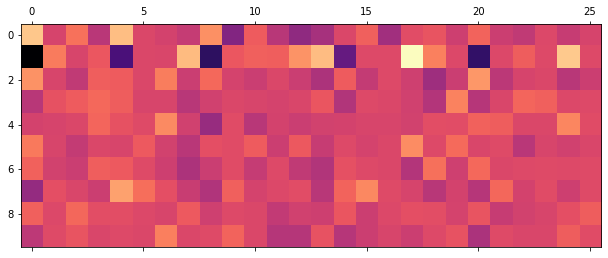

In [72]:
import matplotlib.pyplot as plt

plt.matshow(classifier.coefs_[0].T[0].reshape(10, 26), cmap=plt.cm.magma)
plt.show()

# Step 7: Use the same strategy to classify handwritten digits (easy mode — just run the code!)

Multi-Layer Perceptrons are good at more than just processing text. In fact, an MLP can do a reasonably good job at many classification problems if you're just able to turn your input data into numbers.

One common problem is categorizing photos of handwritten digits based on whether they are a 0, 1, 2, 3, 4, 5, 6, 7, 8, or 9.

The following code downloads a free dataset of digit images and then uses an MLP (almost identical to the one we used for the sorting hat problem) to learn to recognize handwritten digits.

## Step 6.A: Download the images & labels

This code downloads a dataset of labeled example images and then displays a few of them for you to see. **The code is already correct; you only need to run it.**

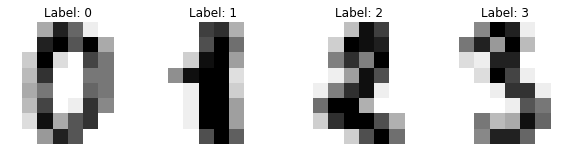

In [78]:
from sklearn import datasets
import matplotlib.pyplot as plt

# Download the digit images
digits = datasets.load_digits()
images = digits.images.reshape((len(digits.images), -1))
labels = digits.target

# Preview five of the images
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title("Label: %i" % label)

## Step 6.B: Split data into training and testing

The following data uses the `train_test_split` function to create a training and testing set, just like we did for the sorting hat problem. (You will almost always do this in machine learning.)

**Again, just run the code. Nothing interesting will appear.**

In [74]:
from sklearn.model_selection import train_test_split

# Split data into 50% train and 50% test subsets
train_data, test_data, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.5, random_state=0
)

## Step 6.C: Create and train the model

Now that we have the training data ready, we can create a Multi-Layer Perceptron classifier (MLP) and train it.

**Run this code. Again, nothing visibly interesting will happen. But the model will be trained!**

In [75]:
from sklearn.neural_network import MLPClassifier

# Create the Multi-Layer Perceptron (MLP) model
classifier = MLPClassifier(
    solver='lbfgs',
    alpha=1e-5,
    hidden_layer_sizes=(),
)

# Learn the digits on the train subset
classifier.fit(train_data, train_labels)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(), solver='lbfgs')

## Step 6.D: Use the model to read digit images

Now that we have a model, let's try using it to make predictions.

**Run this code. It will get some images from the test set and predict what digit they are (hopefully correctly).**

0.946607341490545


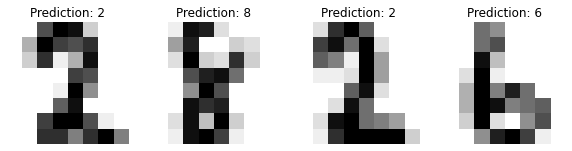

In [76]:
# Calculate the percentage of answers the classifier gets on the test set
# and display the result
print(classifier.score(test_data, test_labels))

# Make some predictions on the test set for display purposes
predicted = classifier.predict(test_data)

# Display the results
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, test_data, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title(f"Prediction: {prediction}")

## Step 6.E: Visualize the model

Again, let's visualize the weights of the model. This time, since it is making predictions for 10 different classes (0 through 9), there are 10 different weight matrices to preview.

**Run this code. If you look closely, you might be able to see a picture of each digit in its weight matrix.**

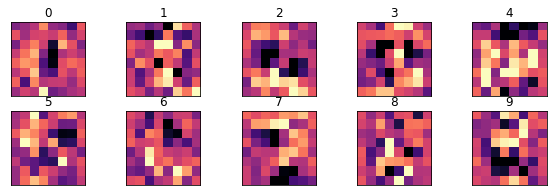

In [77]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 3))
vmin, vmax = classifier.coefs_[0].min(), classifier.coefs_[0].max()
for i, (coef, ax) in enumerate(zip(classifier.coefs_[0].T, axes.ravel())):
    ax.set_title(f"{i}")
    ax.matshow(coef.reshape(8, 8), cmap=plt.cm.magma, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

# Step 8: Next steps

That's all for today! If you want to take this further, I have two recommendations:

1. Try training a model to solve the more difficult *challenge rule* and submit your results to the Kaggle competition. [Click here](https://www.kaggle.com/pulljosh/msu-ai-club-w1-competition-template) and make a copy to start your own competition submission. (The exact same model we used here will likely get you pretty far on the challenge rule as well.) If you achieve anything interesting or figure out what the rule is over the next week, we will share, celebrate, and discuss your results at our next workshop on Monday, September 19th.

2. If you want to learn more about exactly how Multi-Layer Perceptrons (MLPs) work, I **highly reccomend** watching [3Blue1Brown's series on neural networks](https://www.3blue1brown.com/topics/neural-networks). He explains all the math in an approachable way, and he uses the handwritten digits example which you already have experience with.